<a href="https://colab.research.google.com/github/PrathameshPawar119/Agricultural-Commodities-Analysis/blob/main/agricultural_commodities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring Dataset

### Mounting dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/agridata_csv_202110311352.csv', encoding='utf-8')
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836977 entries, 0 to 836976
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836976 non-null  object 
 1   state           836977 non-null  object 
 2   district        836977 non-null  object 
 3   market          836977 non-null  object 
 4   min_price       836976 non-null  float64
 5   max_price       836976 non-null  float64
 6   modal_price     836976 non-null  float64
 7   date            836976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 51.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
min_price,836976.0,138.445995,1622.392619,0.0,12.0,20.00,37.5,80200.0
max_price,836976.0,158.565246,1710.408830,0.0,15.5,25.00,45.0,74240.0
modal_price,836976.0,117.538995,1230.096978,0.0,14.1,22.65,41.0,66000.0


In [ ]:
df.cov()

<ipython-input-7-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,min_price,max_price,modal_price
min_price,2.632158e+06,2.719538e+06,1.380455e+06
max_price,2.719538e+06,2.925498e+06,1.588951e+06
modal_price,1.380455e+06,1.588951e+06,1.513139e+06


Creting new column 'seasons' to analyze the commodities per season

# Preparing Dataset

## Adding column seasons

In [ ]:
# Function to map months to seasons
import datetime
def get_season(date_str):
  try:
    if date_str.find('-') != -1:
      date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
      month_str = date_obj.strftime("%m")  # Get the month part
    else :
      month_str = date_str.split(' ')[1]

    month_dict = {
      '01': 'Shishir',
      '02': 'Shishir',
      '03': 'Vasant',
      '04': 'Vasant',
      '05': 'Grishma',
      '06': 'Grishma',
      '07': 'Varsha',
      '08': 'Varsha',
      '09': 'Sharad',
      '10': 'Sharad',
      '11': 'Hemant',
      '12': 'Hemant',
      'Jan': 'Shishir',
      'Feb': 'Shishir',
      'Mar': 'Vasant',
      'Apr': 'Vasant',
      'May': 'Grishma',
      'June': 'Grishma',
      'July': 'Varsha',
      'Aug': 'Varsha',
      'Sept': 'Sharad',
      'Oct': 'Sharad',
      'Nov': 'Hemant',
      'Dec': 'Hemant'
    }
    return month_dict[month_str]
  except:
    return 'Unknown'


# Apply the function to create the 'season' column
df['season'] = df['date'].map(get_season)

# Save the modified DataFrame to a new CSV file
# df.to_csv('modified_data.csv', index=False)


# Display the updated DataFrame
df

,commodity_name,state,district,market,min_price,max_price,modal_price,date,season
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,Grishma
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,Grishma
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,Grishma
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,Grishma
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,Grishma
...,...,...,...,...,...,...,...,...,...
836972,Arhar (Tur/Red Gram)(Whole),Gujarat,Bharuch,Jambusar(Kaavi),5100.00,5500.00,5300.00,06 Oct 2021,Sharad
836973,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Jasdan,3500.00,5500.00,5000.00,06 Oct 2021,Sharad
836974,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Rajkot,5300.00,6225.00,5650.00,06 Oct 2021,Sharad
836975,Arhar (Tur/Red Gram)(Whole),Gujarat,Junagarh,Visavadar,4750.00,5750.00,5250.00,06 Oct 2021,Sharad


In [ ]:
# Sort by date
df.sort_values(by='date')

,commodity_name,state,district,market,min_price,max_price,modal_price,date,season
831551,Apple,Uttrakhand,UdhamSinghNagar,Rudrapur,2000.0,4000.0,3000.0,02 Oct 2021,Sharad
831422,Apple,Maharashtra,Kolhapur,Kolhapur,4000.0,17500.0,9000.0,02 Oct 2021,Sharad
831421,Apple,Maharashtra,Mumbai,Fruit Market,3600.0,9300.0,6450.0,02 Oct 2021,Sharad
831420,Apple,Maharashtra,Aurangabad,Aurangabad,5000.0,12000.0,8500.0,02 Oct 2021,Sharad
831419,Apple,Madhya Pradesh,Ujjain,Ujjain(F&V),3100.0,5600.0,4198.0,02 Oct 2021,Sharad
...,...,...,...,...,...,...,...,...,...
833619,Apple,Uttar Pradesh,Aligarh,Aligarh,6500.0,6700.0,6600.0,30 Oct 2021,Sharad
833620,Apple,Uttar Pradesh,Allahabad,Allahabad,6500.0,6700.0,6600.0,30 Oct 2021,Sharad
833700,Apple,Uttar Pradesh,Hamirpur,Raath,6150.0,6500.0,6350.0,30 Oct 2021,Sharad
833641,Apple,Uttar Pradesh,Chandauli,Chandoli,6500.0,6700.0,6600.0,30 Oct 2021,Sharad


## Removed Missing values

In [ ]:
df.isnull().sum()

commodity_name    1
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
season            0
dtype: int64

In [ ]:
# Removing missing  values
df = df.dropna()
df.isnull().sum()

commodity_name    0
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
season            0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# Encode categorical variables using one-hot encoding
# df_encoded = pd.get_dummies(df, columns=['commodity_name', 'state', 'district', 'market', 'season'])
# df_encoded.corr(numeric_only=True)
df.corr()

<ipython-input-12-35361b0cb909>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,min_price,max_price,modal_price
min_price,1.000000,0.980029,0.691707
max_price,0.980029,1.000000,0.755211
modal_price,0.691707,0.755211,1.000000


### All commodities present

In [ ]:
df['commodity_name'].nunique()

248

In [ ]:
unique_commodity_names = df['commodity_name'].unique()
unique_commodity_names

array(['Ajwan', 'Alasande+Gram', 'Amaranthus', 'Amla(Nelli+Kai)',
       'Amphophalus', 'Antawala', 'Apple', 'Arhar+Dal(Tur+Dal)',
       'Ashgourd', 'Avare+Dal', 'Banana', 'Banana+-+Green',
       'Barley+(Jau)', 'Beans', 'Beaten+Rice', 'Beetroot', 'Betal+Leaves',
       'Bitter+gourd', 'Black+pepper', 'Bottle+gourd', 'Brinjal',
       'Broken+Rice', 'Cabbage', 'Capsicum', 'Cardamoms', 'Carrot',
       'Cashewnuts', 'Castor+Seed', 'Cauliflower', 'Coconut',
       'Chapparad+Avare', 'Chennangi+Dal', 'Chikoos(Sapota)', 'Chili+Red',
       'Chilly+Capsicum', 'Cloves', 'Cluster+beans', 'Cocoa',
       'Coconut+Oil', 'Coconut+Seed', 'Coffee', 'Colacasia', 'Copra',
       'Coriander(Leaves)', 'Corriander+seed', 'Cowpea(Veg)', 'Cotton',
       'Cucumbar(Kheera)', 'Cummin+Seed(Jeera)', 'Drumstick',
       'Dry+Chillies', 'Dry+Fodder', 'Dry+Grapes', 'Duster+Beans', 'Egg',
       'Elephant+Yam+(Suran)', 'Field+Pea', 'Firewood', 'Fish', 'Garlic',
       'Ghee', 'Gingelly+Oil', 'Ginger(Dry)', 'Gi

## Selecting top commodities and states for simplifying analysis

In [ ]:
# Top 25 commodities to proceed with
df['commodity_name'].value_counts().head(20)

Onion                  44908
Tomato                 42715
Wheat                  41172
Potato                 37810
Brinjal                33687
Green+Chilli           33004
Apple                  30025
Cauliflower            23578
Bottle+gourd           22445
Mustard                21350
Cucumbar(Kheera)       20417
Maize                  18563
Pumpkin                18299
Cabbage                18055
Bitter+gourd           17813
Ginger(Green)          16976
Paddy(Dhan)(Common)    15924
Soyabean               15917
Garlic                 13704
Banana                 13646
Name: commodity_name, dtype: int64

In [ ]:
# Removing other commodity records and keeping only top 8
# to reduce complexity
commodity_names_to_keep = ['Onion', 'Tomato', 'Potato', 'Brinjal', 'Apple', 'Cauliflower', 'Maize', 'Soyabean', 'Garlic', 'Banana']

df = df[df['commodity_name'].isin(commodity_names_to_keep)]

In [ ]:
# now we have only 6 commodities to play with

unique_commodity_names = df['commodity_name'].unique()
unique_commodity_names

array(['Apple', 'Banana', 'Brinjal', 'Cauliflower', 'Garlic', 'Maize',
       'Onion', 'Potato', 'Soyabean', 'Tomato'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274553 entries, 75 to 834495
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  274553 non-null  object 
 1   state           274553 non-null  object 
 2   district        274553 non-null  object 
 3   market          274553 non-null  object 
 4   min_price       274553 non-null  float64
 5   max_price       274553 non-null  float64
 6   modal_price     274553 non-null  float64
 7   date            274553 non-null  object 
 8   season          274553 non-null  object 
dtypes: float64(3), object(6)
memory usage: 20.9+ MB


In [ ]:
df['state'].value_counts().head(10)

Uttar Pradesh       122950
Maharashtra          25890
Punjab               22599
Madhya Pradesh       15111
Kerala               11347
West Bengal          11180
Himachal Pradesh      9233
Haryana               8883
Gujarat               8816
Odisha                6998
Name: state, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Group the data by state and calculate the total contribution of each state
state_contributions = df['state'].value_counts().reset_index()
state_contributions.columns = ['State', 'Contribution']

# Create an interactive pie chart using Plotly
fig = px.pie(state_contributions, values='Contribution', names='State', title='Contributions of States in Indian Commodities', width=1000, height=1000)

# Customize the layout
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1], marker=dict(line=dict(color='#000000', width=2)))
# Show the interactive pie chart
fig.show()


## All selected states analysis

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



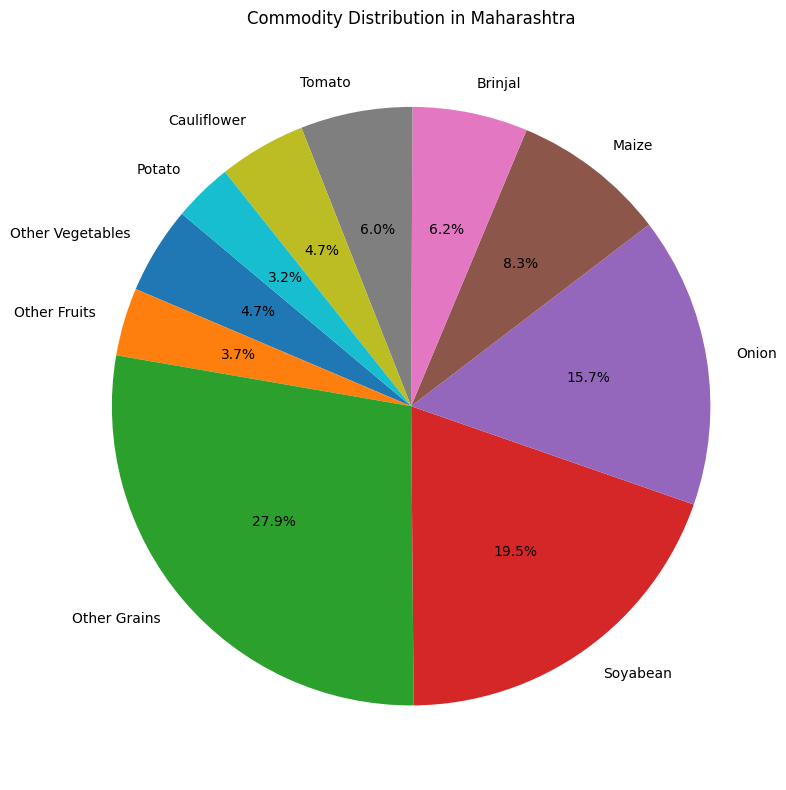

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



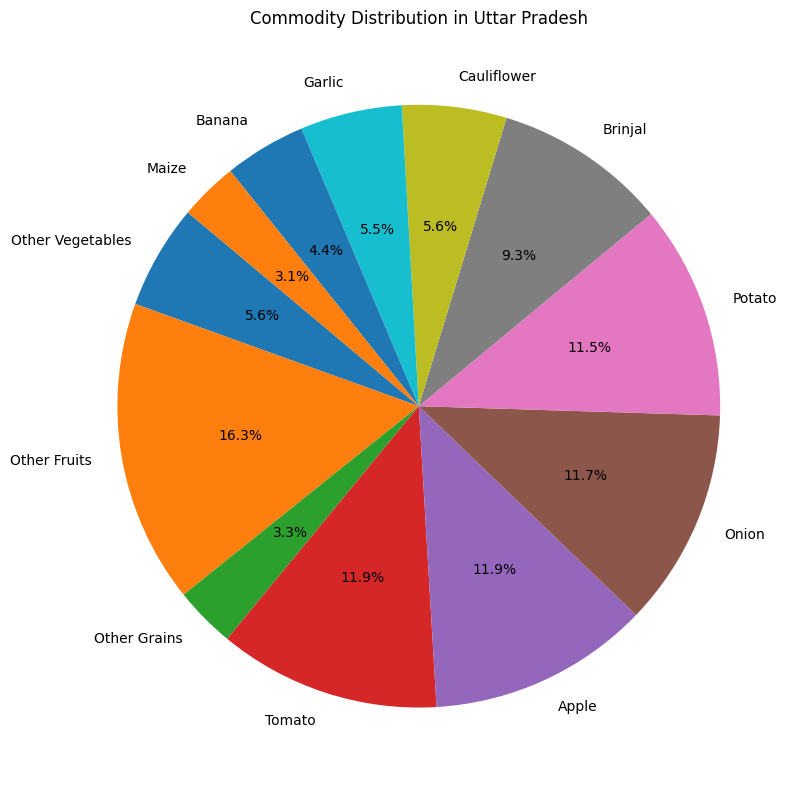

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



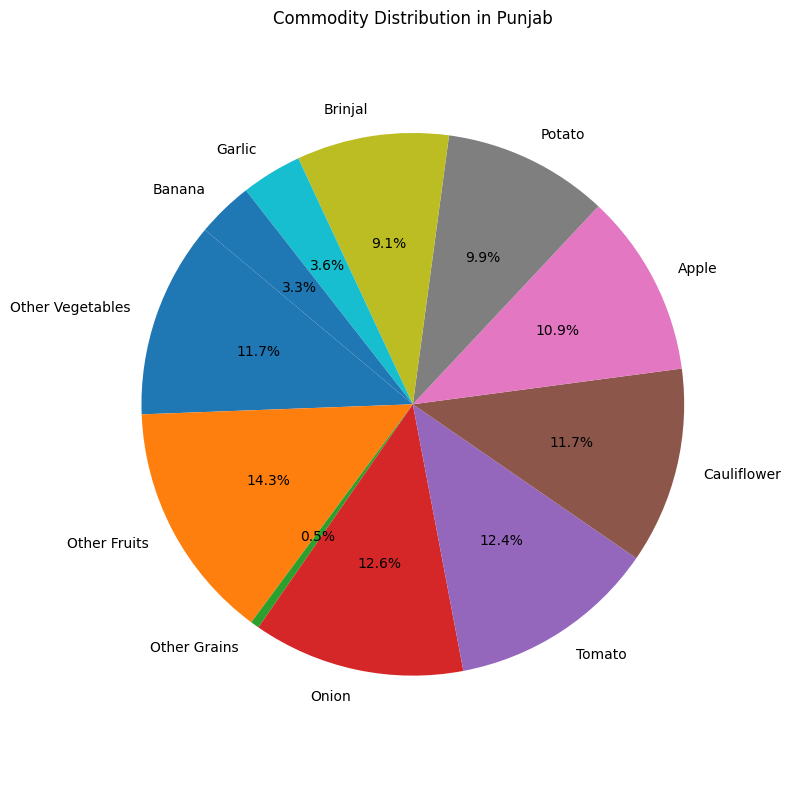

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



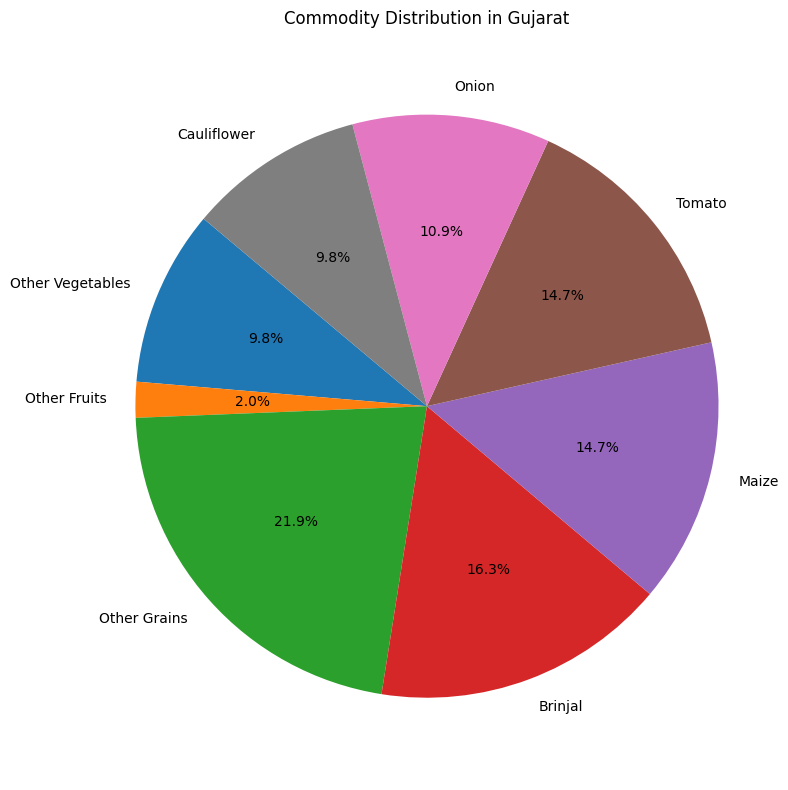

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



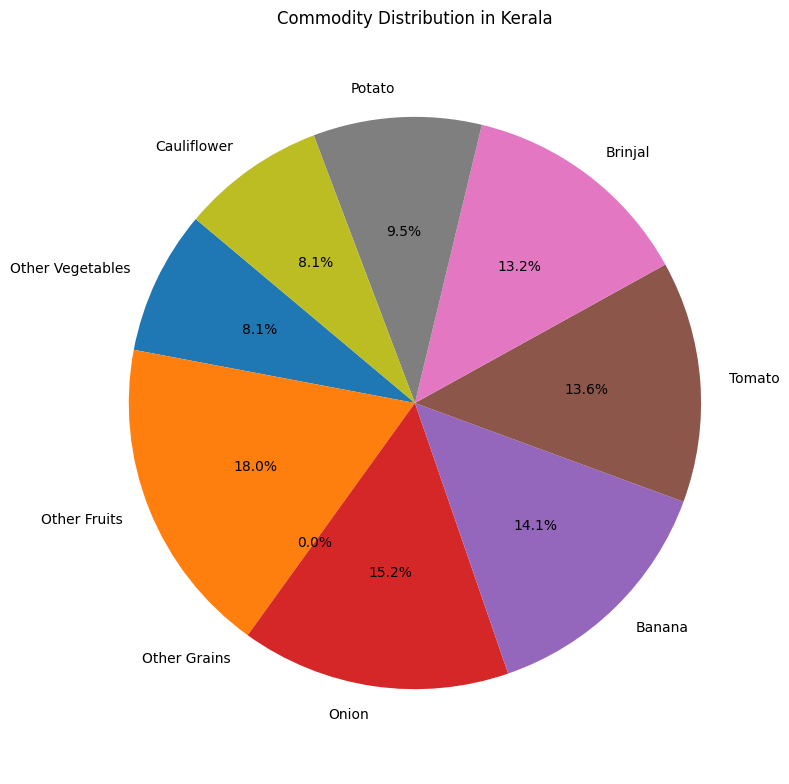

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



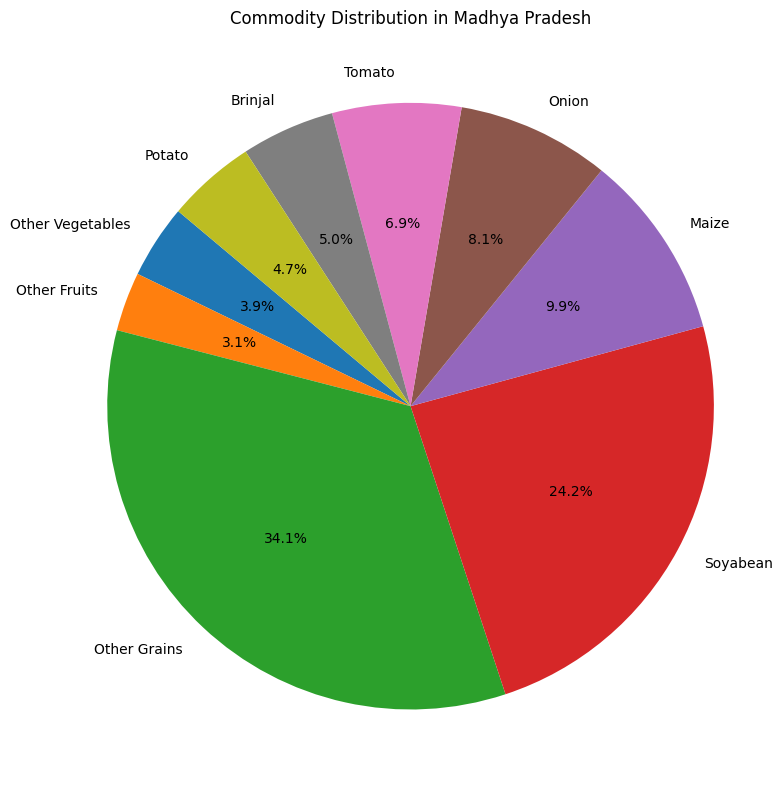

<ipython-input-21-d87c4b56f0d8>:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



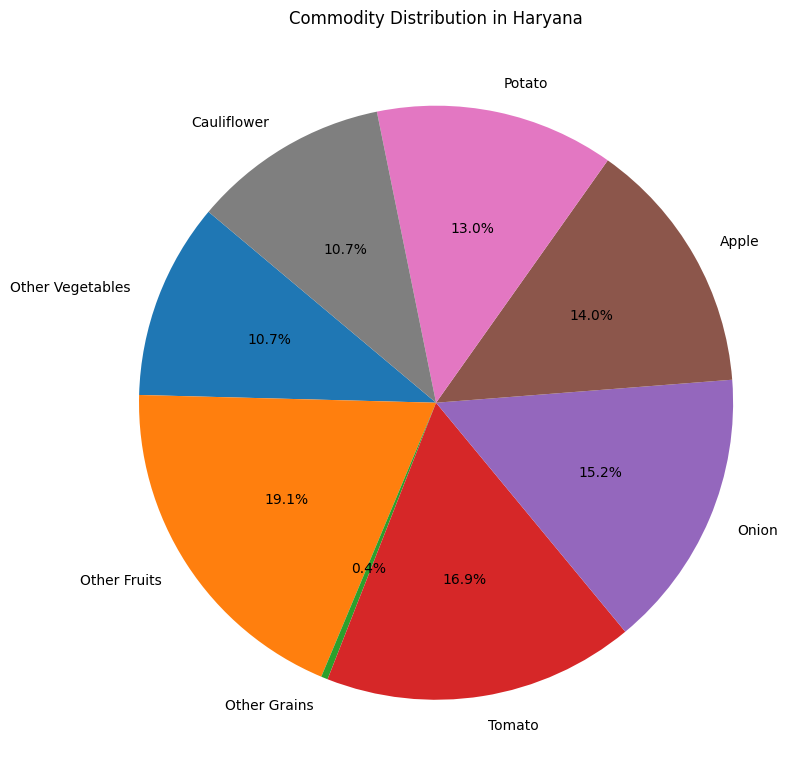

In [ ]:
# List of top states
state_groups = ['Maharashtra', 'Uttar Pradesh', 'Punjab', 'Gujarat', 'Kerala', 'Madhya Pradesh', 'Haryana']

# Define a threshold for the minimum number of occurrences to show a commodity individually
threshold = 1000

# Loop through each state
for state in state_groups:
    # Filter the data for the current state
    state_data = df[df['state'] == state]

    # Count the occurrences of each commodity in the state
    commodity_counts = state_data['commodity_name'].value_counts()

    # Group less frequent commodities into broader categories
    broad_categories = {
        'Other Vegetables': ['Bottle+gourd', 'Cabbage', 'Cauliflower', 'Pumpkin', 'Raddish'],
        'Other Fruits': ['Apple', 'Banana', 'Pomegranate'],
        'Other Grains': ['Maize', 'Soyabean', 'Rice', 'Mustard'],
        # Add more categories as needed
    }

    # Initialize a dictionary to hold counts for broader categories
    broad_category_counts = {}

    # Iterate through the broad categories
    for broad_category, commodities in broad_categories.items():
        # Sum the counts of commodities in the broad category
        broad_category_counts[broad_category] = commodity_counts[commodity_counts.index.isin(commodities)].sum()

    # Combine the broad categories with individual commodities
    combined_counts = pd.Series(broad_category_counts)
    combined_counts = combined_counts.append(commodity_counts[commodity_counts >= threshold])

    # Create a pie chart for the current state
    plt.figure(figsize=(8, 8))
    plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Commodity Distribution in {state}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Show or save the pie chart (you can choose to save the charts if needed)
    plt.tight_layout()
    plt.show()


In [ ]:
! pip install pyngrok dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.3 MB/s eta 0:00:00
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=8a825b48647c9ac3f2ed9932c8cd23524c62cda96fd1742f0b7b578b4846c3d4
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0


## Dash used for analysis

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

<ipython-input-23-4b1cddf8f96f>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-23-4b1cddf8f96f>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



### Creating a Dash app to visualize dynamically

In [ ]:
# Create a Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Agricultural Commodity Price Trends"),
    dcc.Dropdown(
        id='state-dropdown',
        options=[
            {'label': state, 'value': state} for state in df['state'].unique()
        ],
        value='Maharashtra',
        multi=False
    ),
    dcc.Dropdown(
        id='commodity-dropdown',
        options=[
            {'label': commodity, 'value': commodity} for commodity in df['commodity_name'].unique()
        ],
        value='Onion',
        multi=False
    ),
      dcc.Dropdown(
        id='district-dropdown',
        options=[
            {'label': district, 'value': district} for district in df['district'].unique()
        ],
        value='Pune',
        multi=False
    ),
    dcc.Graph(id='line-chart')
])

@app.callback(
    Output('line-chart', 'figure'),
    Input('state-dropdown', 'value'),
    Input('commodity-dropdown', 'value'),
    Input('district-dropdown', 'value')
)
def update_chart(selected_state, selected_commodity, selected_district):
    filtered_df = df[(df['state'] == selected_state) & (df['commodity_name'] == selected_commodity) & (df['district'] == selected_district)]
    fig = px.line(filtered_df, x='date', y=['min_price', 'max_price', 'modal_price'], title=f'Price Trends for {selected_commodity} in {selected_state} for {selected_district}')
    return fig

# Set up ngrok
# public_url = ngrok.connect()
# print(' * ngrok tunnel "main":', public_url)

In [ ]:
app.run_server(mode='external')

<IPython.core.display.Javascript object>

In [ ]:
# sign in to ngrock and paste your auth token below
! ngrok authtoken <<your_ngrk_auth-token_here>>

### Creating server

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect('8050')
ssh_url = ngrok.connect(22, 'tcp')

In [ ]:
public_url

<NgrokTunnel: "https://bd65-35-231-120-74.ngrok-free.app" -> "http://localhost:8050">

In [ ]:
# ngrok.kill()

# Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_cols = ['commodity_name', 'state', 'district', 'market', 'season']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### feature encoding and extracting date

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['commodity_name', 'state', 'market', 'district'])

# Convert the 'date' column to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Define features (X) and target variable (y)
X = df.drop(columns=['modal_price', 'date'])
y = df['modal_price']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### standardizing features

In [ ]:
# Standardize features (optional but can help with model training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define the regression model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")


### Predicting and saving model

In [ ]:
y_pred = model.predict(X_test)
model.save("your_model_name.h5")

1183/1183 [==============================] - 7s 6ms/step


In [ ]:
commodity_name = 'Apple'
state = 'Maharashtra'
district = 'Pune'
season = 'Hemant'

predicted_modal_price = predict_modal_price(commodity_name, state, district, season)
print(f"Predicted Modal Price for {commodity_name} in {state}, {district}, {season}: {predicted_modal_price}")


NameError: ignored